In [30]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib notebook

In [2]:
def doobGillespie(diagonal, currState):
    times = []
    state = currState
    # print(- np.diag(Q)[state])
    timeSpent = np.random.exponential(scale=1/diagonal[state])
    times.append(timeSpent)
    state -= 1
    # print(state)
    while state != 0:
        # print(- np.diag(Q)[state])
        timeSpent = np.random.exponential(scale=1/diagonal[state])
        times.append(times[-1] + timeSpent)
        state -= 1
        # print(state)
    return times

In [3]:
approx = lambda S_0, I_0, Rsi, j : np.log(
                        S_0 * (S_0 + I_0 + 1 - j) * (1/(I_0 * (j - 1)))
                    ) / (Rsi * (S_0 + I_0))

In [28]:
Ns = range(8, 22)
Rs = list(np.linspace(0.1, 3, num=25, endpoint=True))

errors = np.zeros((len(Ns), len(Rs)))

for n, N in enumerate(Ns, 0):
    for r, Rsi in enumerate(Rs, 0):
        trials = 5000
        I_0 = 1
        S_0 = N - I_0
        Q = np.zeros((N + 1, N + 1))
        timings = np.zeros((trials, S_0))
        ## For this model, when total - i = 0, i.e. there are no infectives then
        ## the rate of going anywhere is 0
        for i in range(1, N): # Start at population 1 and only go up to N - 1
            Q[i, i] = - Rsi * i * (N - i)
            Q[i, i - 1] = Rsi * i * (N - i)
        
        diagonal = (- np.diagonal(Q))
        
        for i in range(trials):
            timings[i, :] = doobGillespie(diagonal, S_0)
        
        avg = np.average(timings, axis=0) 
        a = [approx(S_0, I_0, Rsi, j) for j in range(2, S_0 + 1)]
        errors[n, r] = max(abs(m - n) for m, n in zip(a, list(reversed(avg))[1:]))

<IPython.core.display.Javascript object>


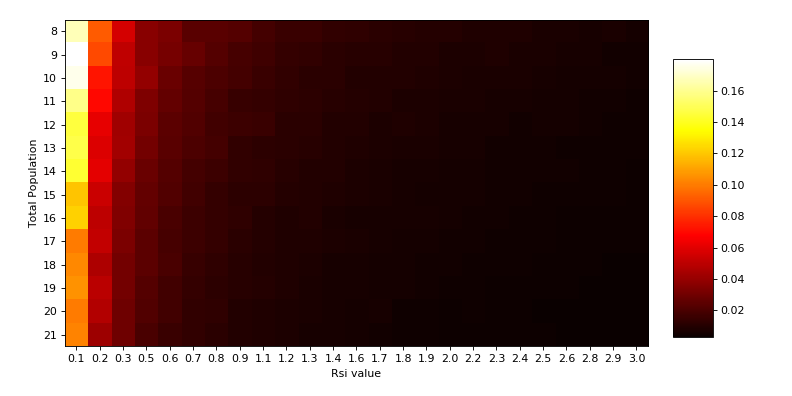

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(errors, cmap='hot', interpolation='nearest')
ax.set_xticks(np.arange(len(Rs)))
ax.set_yticks(np.arange(len(Ns)))
ax.set_xticklabels([round(r, 1) for r in Rs])
ax.set_yticklabels(Ns)
ax.set_xlabel("Rsi value")
ax.set_ylabel("Total Population")

plt.subplots_adjust(left=0.05, top=0.95, right=0.85, bottom=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()